# Analyse the Popularity of Different Programming Languages over Time

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about? 

StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

To figure out which language is the most popular, all we need to do is count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!


Today you will learn:
- How to visualise your data and create charts with Matplotlib
- How to pivot, group and manipulate your data with Pandas to get it into the format you want
- How to work with timestamps and time-series data
- How to style and customise a line chart to your liking

## Preliminary Data Exploration

Read the .csv file and store it in a Pandas DataFrame called df. Have a look at the [read_csv() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and try to provide these column names: `['DATE', 'TAG', 'POSTS']`

In [4]:
import pandas as pd
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

Loot at the first and last 5 rows of the DataFrame

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


How many rows and how many columns does it have?

In [ ]:
df.shape
# 3 Columns
# 1991 Rows

(1991, 3)

Count the number of entries in each column.

In [8]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Note that .count() will actually tell us the number of non-NaN values in each column.

## Analysis by Programming Language

The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

In [19]:
# df[df['TAG'] == 'c#']['POSTS'].sum() # 1423530

posts_per_language = df[['TAG', 'POSTS']].groupby(by=['TAG']).sum() # 1423530
posts_per_language



,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [21]:
sorted_posts_per_language = posts_per_language.sort_values(by='POSTS', ascending=False)
sorted_posts_per_language

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Also, some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

In [30]:
has_posts = df.copy()
has_posts.insert(3, 'HAS_POSTS', 1)
has_posts[['TAG', 'HAS_POSTS']].groupby(by='TAG').sum()

,HAS_POSTS
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [35]:
df[['TAG', 'DATE']].groupby('TAG').count()

,DATE
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


## Data Cleaning

### Working with Time Stamps

Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column: 

In [36]:
df['DATE'][1]

'2008-08-01 00:00:00'

Alternatively, for column names no spaces, we can also use the dot-notation:

In [37]:
df.DATE[1]

'2008-08-01 00:00:00'

I prefer the square bracket notation for column names since it's more flexible, but with the dot notation, you get to use autocomplete, which is also nice.

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of '2008-07-01 00:00:00' to a datetime object with the format of '2008-07-01'

### Inspect the Data Type

When we type check the contents of this cell, we see that we are not dealing with a date object, but rather with a string.

In [38]:
type(df['DATE'][1])

str

This is not very handy. Not only will the string format always show the unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times. Pandas can help us convert the string to a timestamp using the [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [40]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

Let's use Pandas `to_datetime()` to convert the entire `df['DATE']` column.

In [41]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


Excellent. Now we can start thinking about how to manipulate our data so that we get a one column per programming language.

## Data Manipulation

### Pivoting DataFrames

**The [.pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method**

Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor:


In [42]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


The easiest way to accomplish this is by using the .pivot() method in Pandas. Try the example for yourself. The thing to understand is how to supply the correct aguments to get the desired outcome. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells. 

In [43]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


However, there's one very important thing to notice. What happens if a value is missing? In the example above there's no value for old Sylvester. In this case, the .pivot() method will insert a NaN value.

**Mini-Challenge**

- Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

In [66]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


- Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [67]:
reshaped_df.shape
# 145 Rows
# 14 Columns

(145, 14)

- Examine the head and the tail of the DataFrame. What does it look like?

In [68]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [69]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


- Print out the column names.

In [70]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

- Count the number of entries per column

In [71]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

### Dealing with NaN Values

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the `.fillna()` method.

In [72]:
reshaped_df.fillna(0, inplace=True)

The inplace argument means that we are updating pivoted_df. Without this argument we would have to write something like this:

In [73]:
reshaped_df = reshaped_df.fillna(0)

Let's check if we successfully replaced all the NaN values in our DataFrame.

In [74]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


We can also check if there are any NaN values left in the entire DataFrame with this line:

In [75]:
reshaped_df.isna().values.any()

False

Here we are using the `.isna()` method that we've used before, but we're chaining two more things: the `values` attribute and the `any()` method. This means we don't have to search through the entire DataFrame to spot if `.isna()` is True.

Now we're all set to create some charts and visualise our data.

## Data Visualization with MatPlotlib

### Matplotlib

```bash
pip install matplotlib
```

To create our first charts we're going to use a library called [Matplotlib](https://matplotlib.org/). There are many different libraries in Python to help us create charts and graphs. Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas, so let's check it out.

First, we have to import Matplotlib.

In [76]:
import matplotlib.pyplot as plt

You can actually show a line chart for the popularity of a programming language using only a single line of code. Can you use the [.plot() documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to figure out how to do this? Try and plot the popularity of the Java programming language. Here's what you're aiming for:

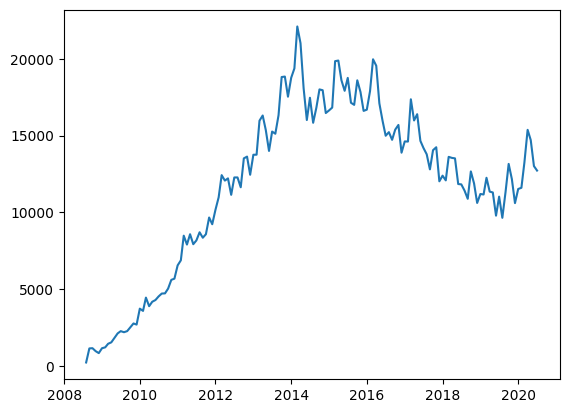

In [86]:
plt.plot('DATE', 'POSTS', data=df[df['TAG'] == 'java'])

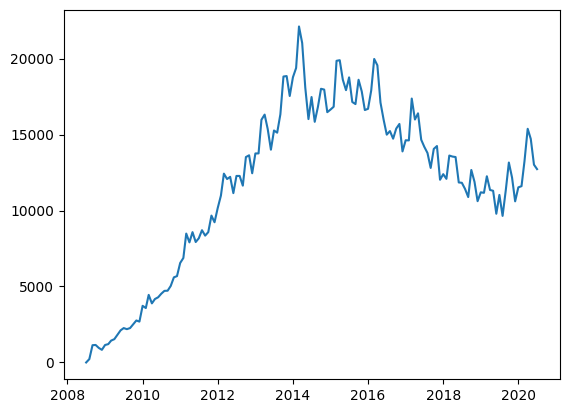

In [87]:
plt.plot(reshaped_df.index, reshaped_df.java)

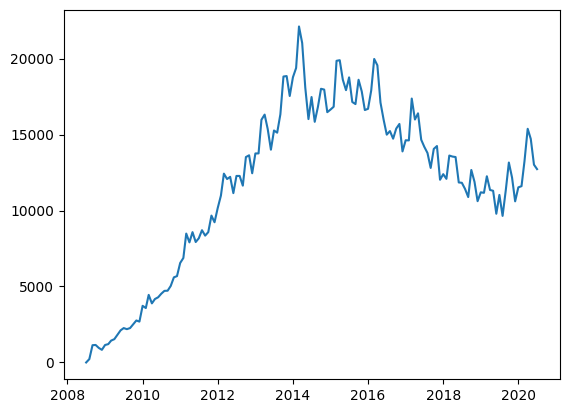

In [88]:
plt.plot(reshaped_df.index, reshaped_df['java'])

### Styling the Chart

Let's look at a couple of methods that will help us style our chart:

`.figure()` - allows us to resize our chart

`.xticks()` - configures our x-axis

`.yticks()` - configures our y-axis

`.xlabel()` - add text to the x-axis

`.ylabel()` - add text to the y-axis

`.ylim()` - allows us to set a lower and upper bound

To make our chart larger we can provide a width (16) and a height (10) as the `figsize` of the figure.

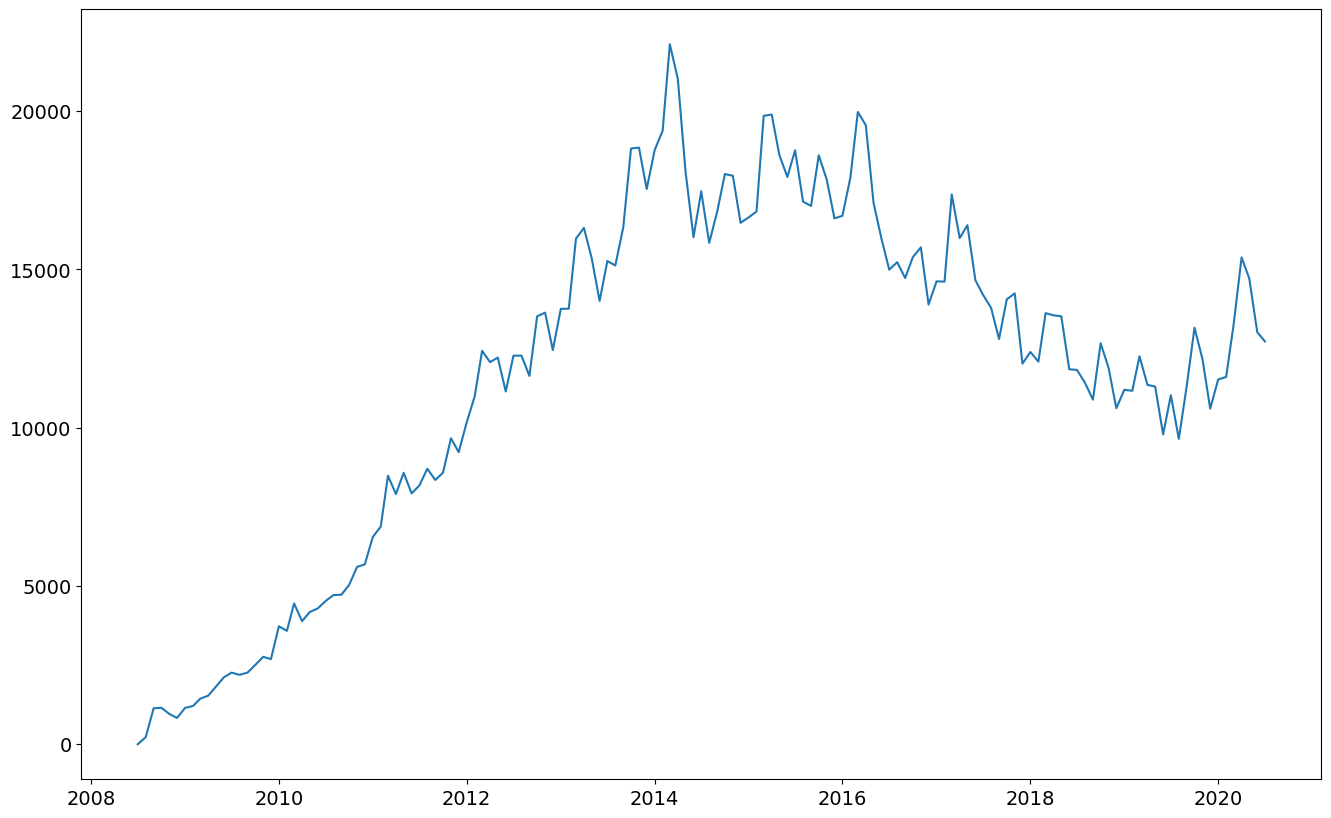

In [90]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with `.ylim()`.

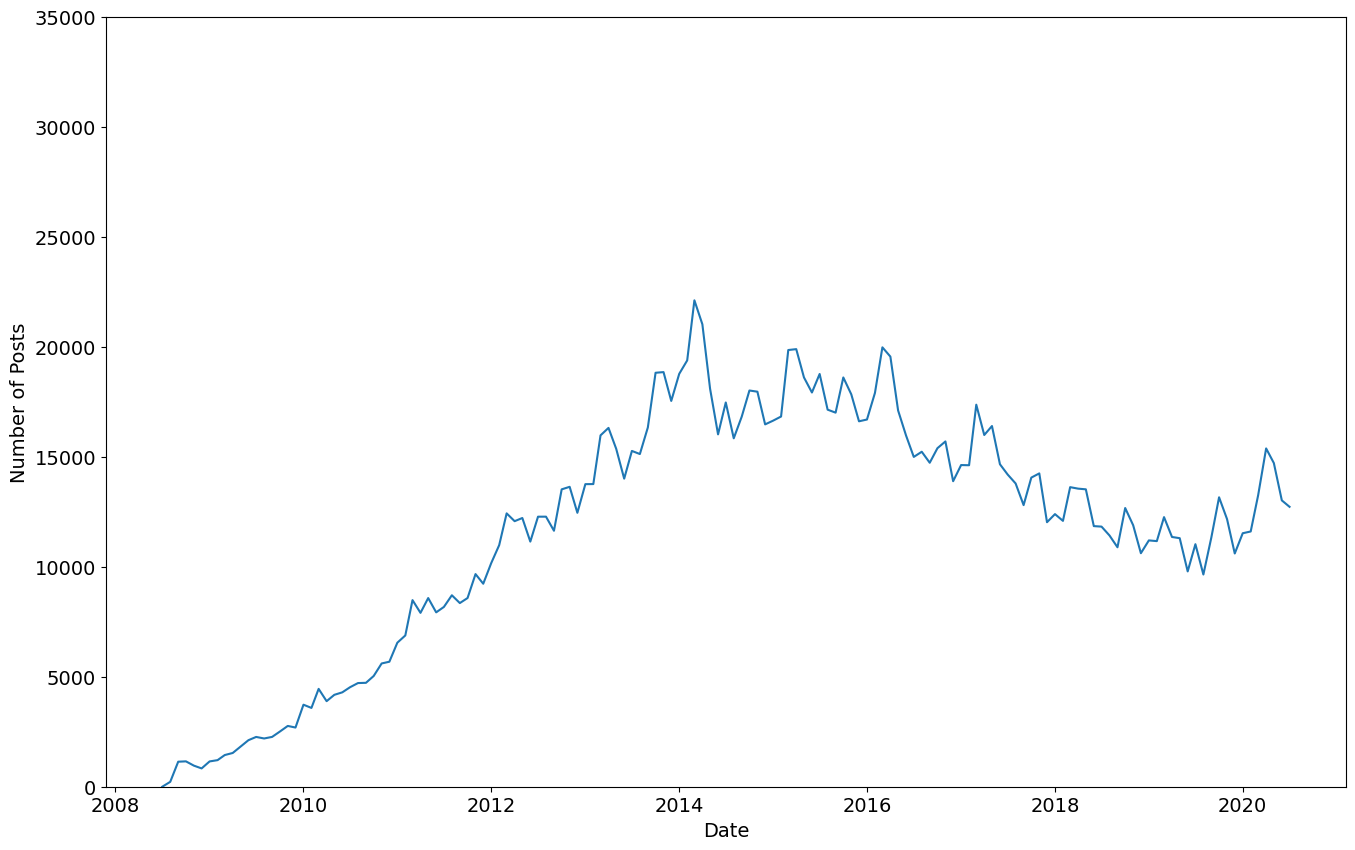

In [93]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

Now that you've successfully created and styled your chart, can you figure out how to plot both Java and Python next to each other?

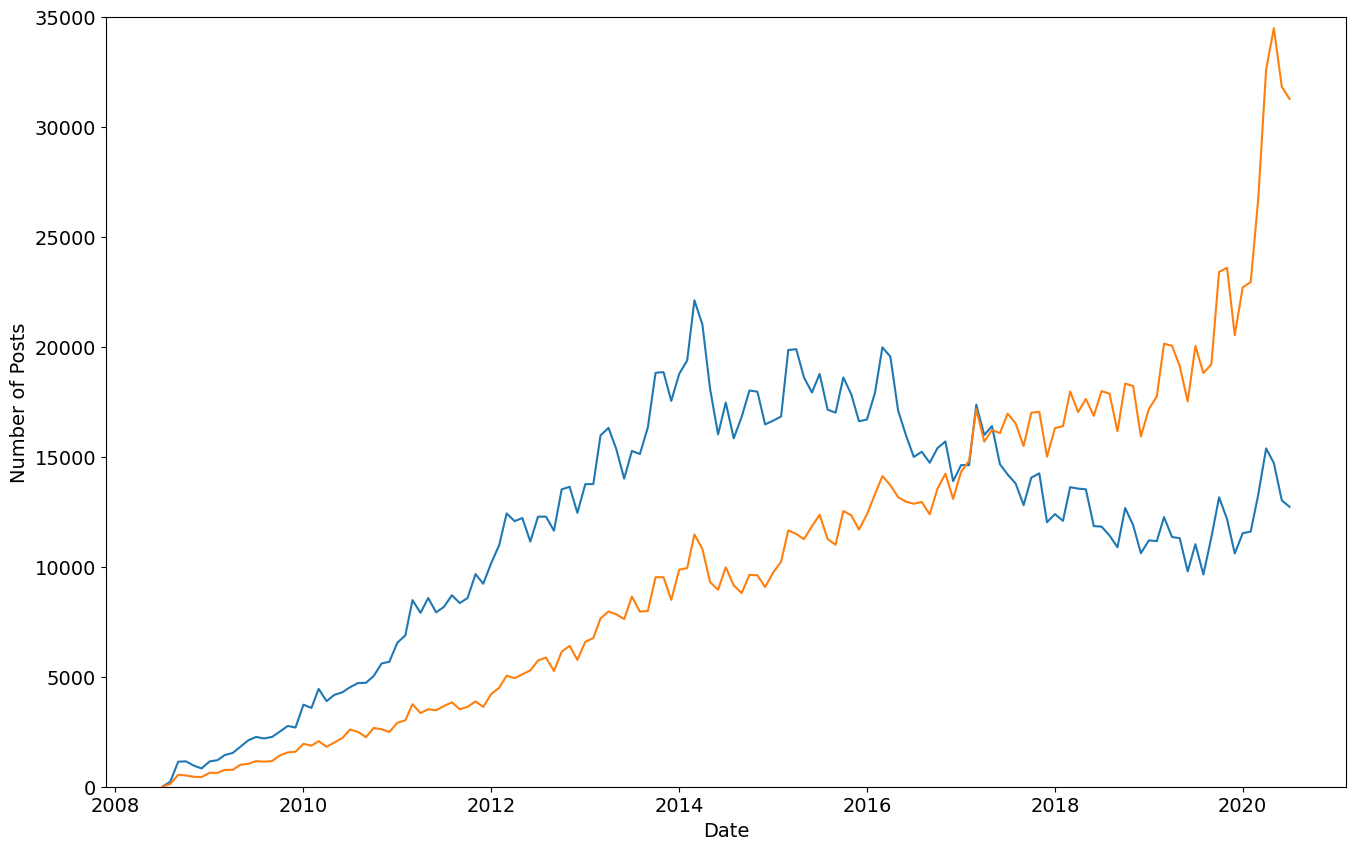

In [94]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

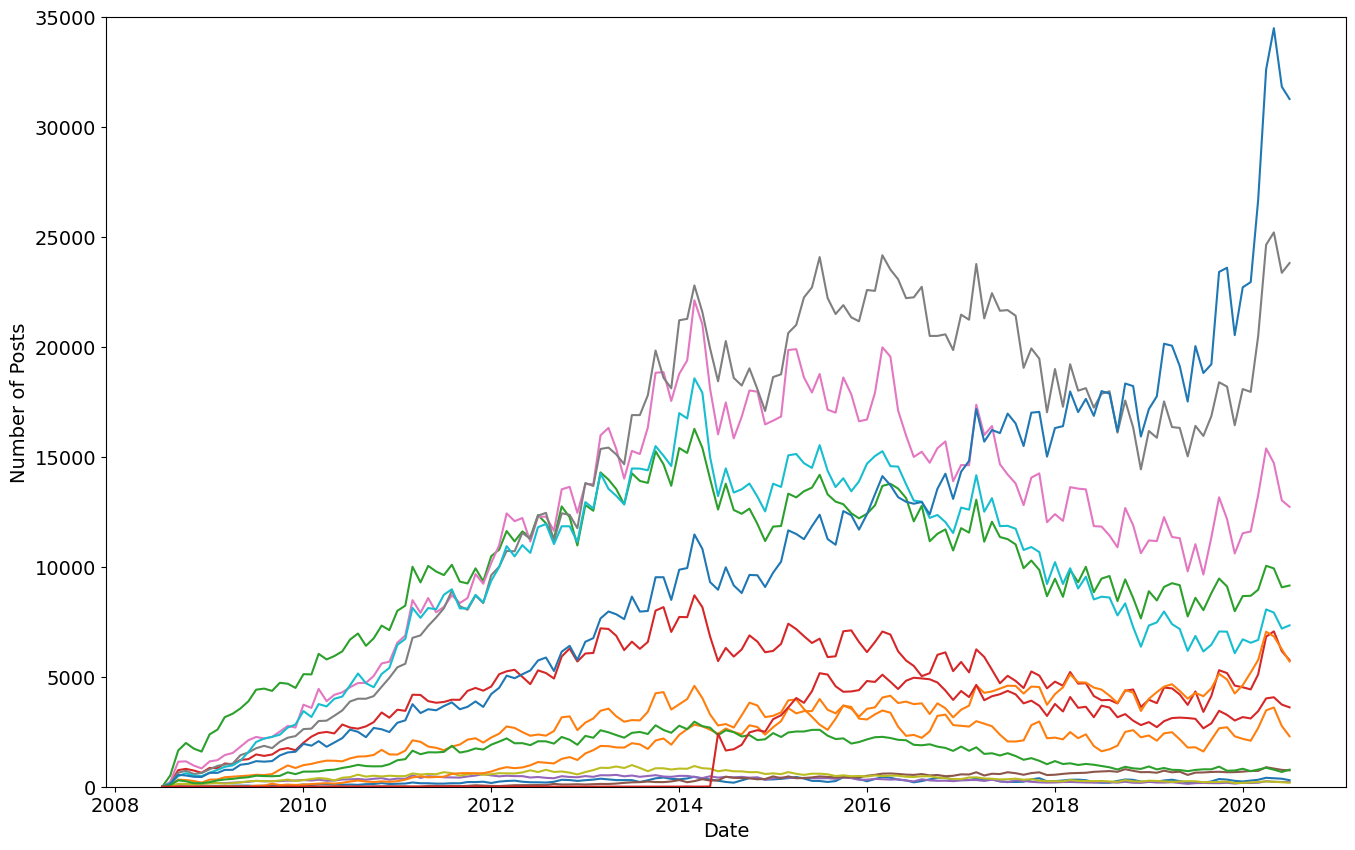

In [97]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col])

But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

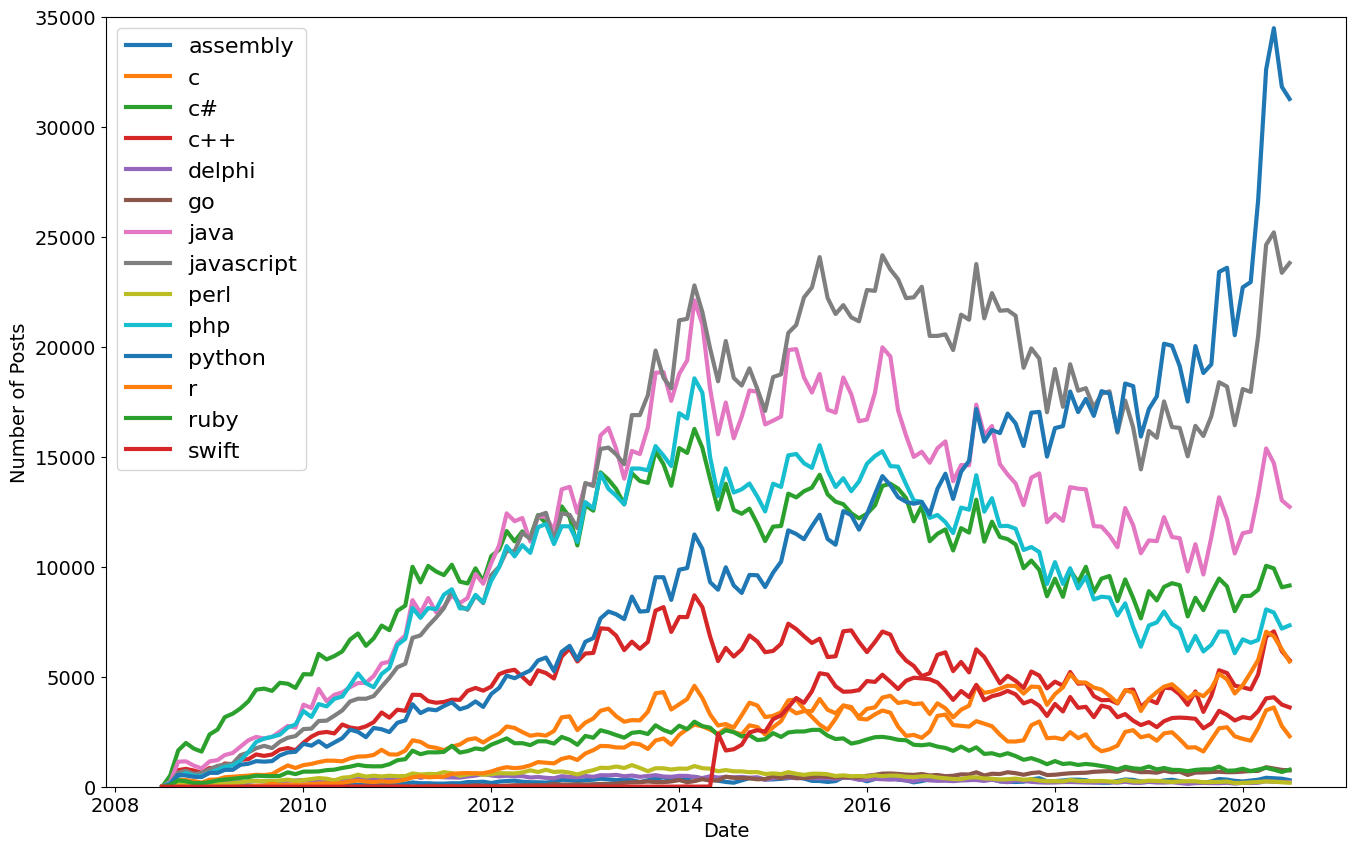

In [99]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col], linewidth=3, label=reshaped_df[col].name)
plt.legend(fontsize=16)

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =) 

## Smoothing out Time-Series Data

Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). We can chain these two methods up to create a DataFrame made up of the averaged observations.

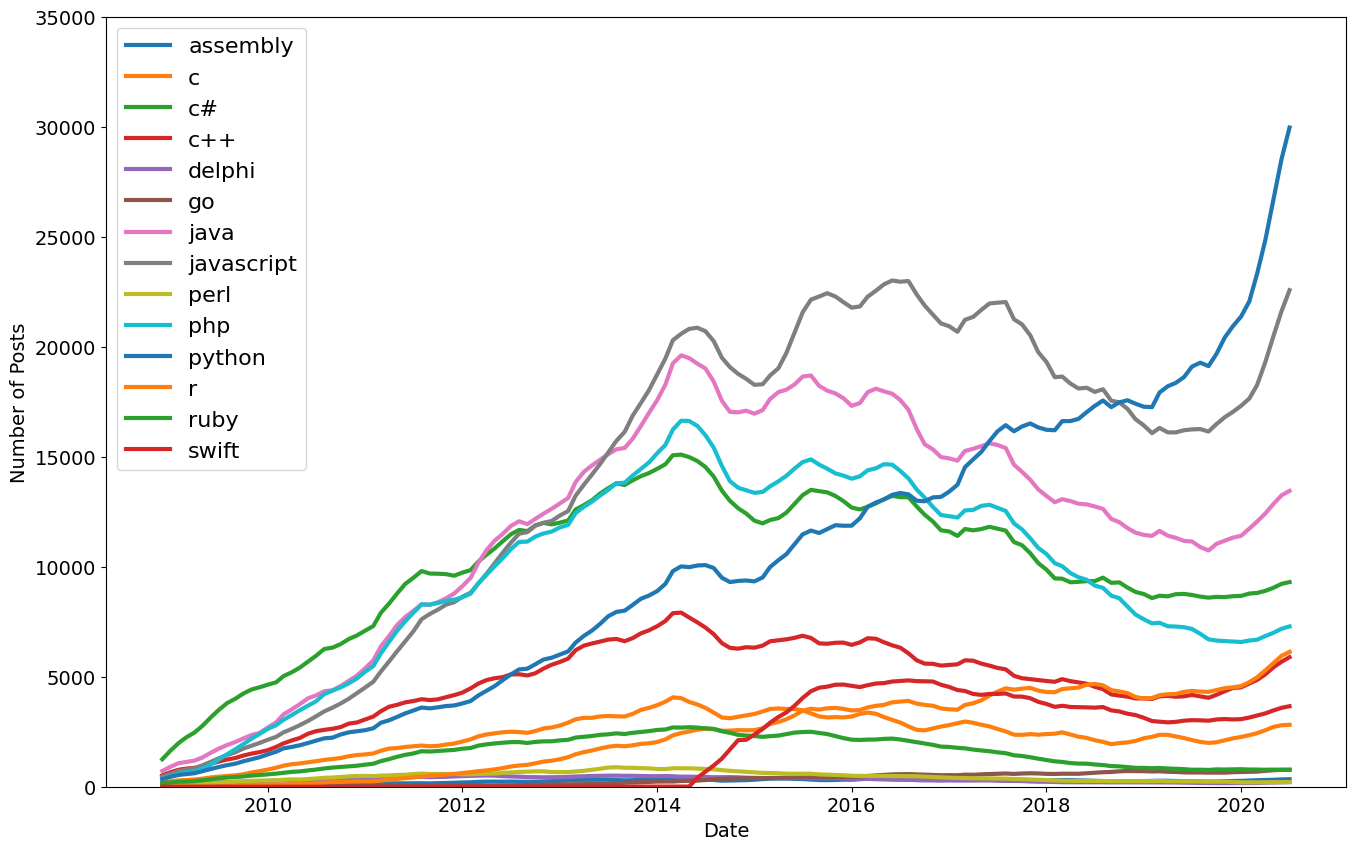

In [100]:
# The windows is the number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], linewidth=3, label=roll_df[col].name)
plt.legend(fontsize=16)

Play with the window argument (use 3 or 12) and see how the chart changes!

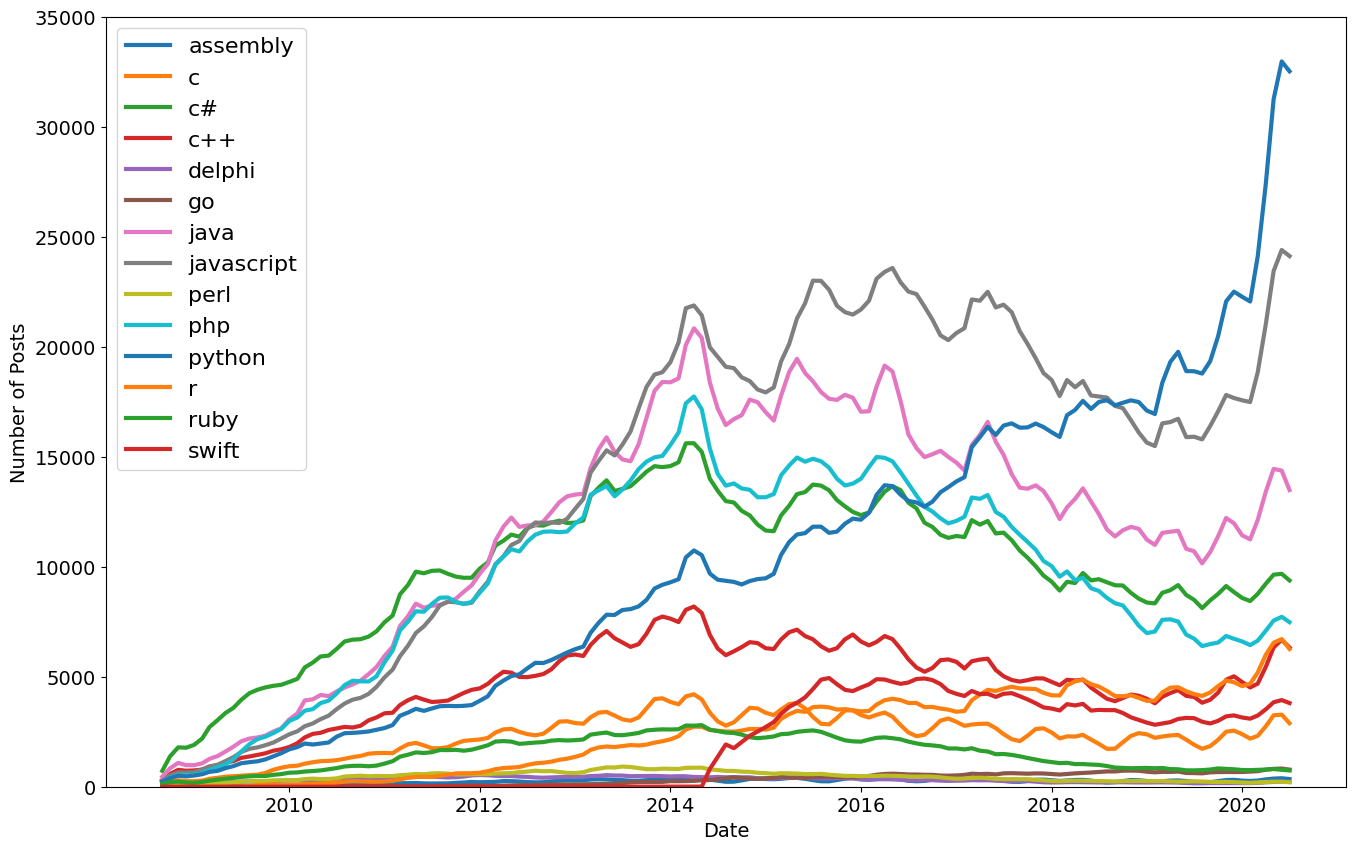

In [101]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], linewidth=3, label=roll_df[col].name)
plt.legend(fontsize=16)

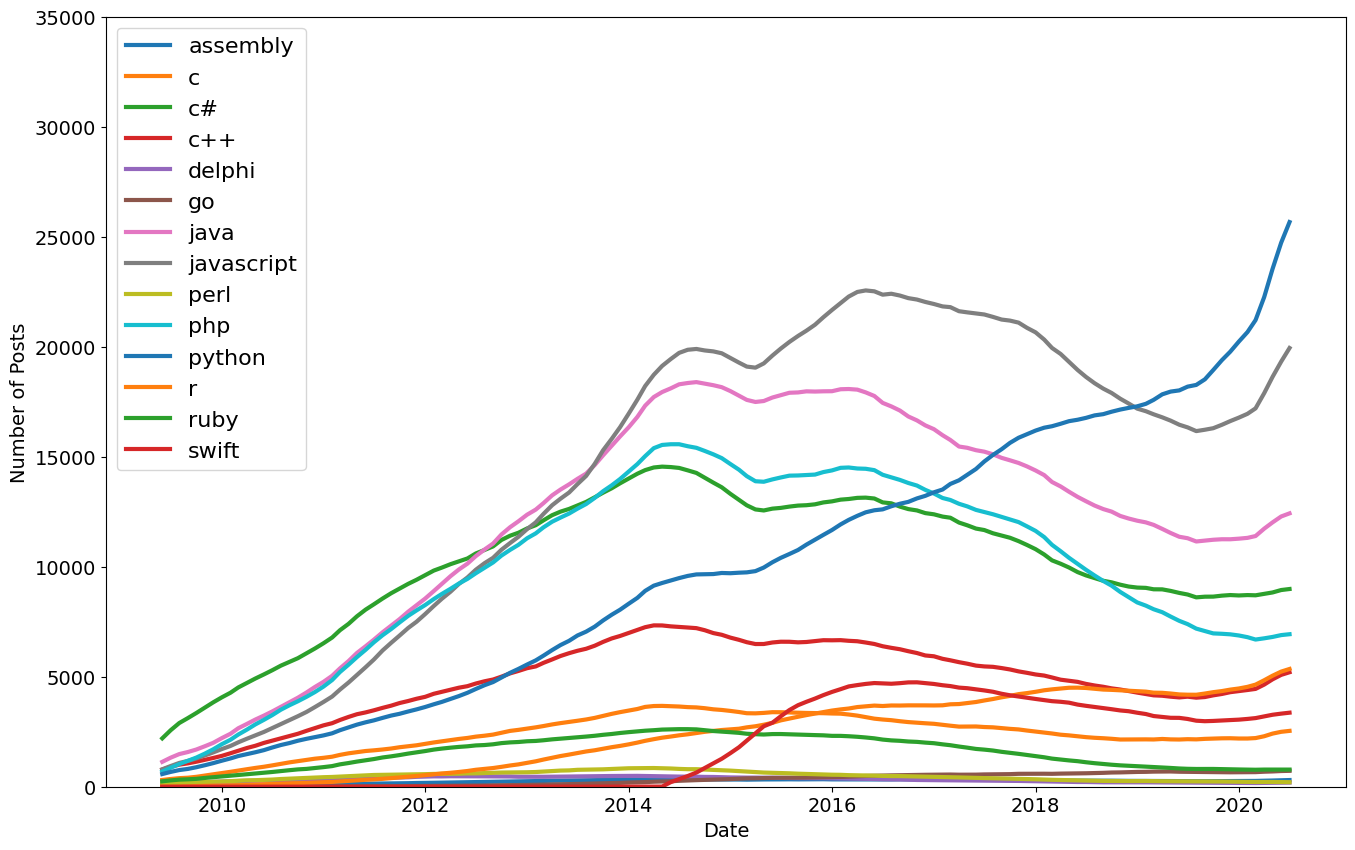

In [102]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], linewidth=3, label=roll_df[col].name)
plt.legend(fontsize=16)

## Learning Points & Summary

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

- used `.groupby()` to explore the number of posts and entries per programming language

- converted strings to Datetime objects with `to_datetime()` for easier plotting

- reshaped our DataFrame by converting categories to columns using `.pivot()`

- used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using `.fillna()`

- created (multiple) line charts using `.plot()` with a for-loop

- styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

- added a legend to tell apart which line is which by colour

- smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.